### Introduction
In this notebook ,we're going to through an example machine learning project with the goal of helping a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

### Customer personality analysis
Helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Data 
The dataset is of an imaginery retail store done by Microsoft obtained from https://www.microsoft.com/en-us/download/details.aspx?id=18279

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#Load data 
consoto_data=pd.read_csv('D:/DS/P Tuts/Databases/SQL/queries/ContosoRetail/Contosso_Retail_CustomerQuery3.csv')

#Remove spaces before column names
consoto_data.columns=consoto_data.columns.str.replace(' ','')
#View data
consoto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 57 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CustomerKey                100000 non-null  int64  
 1   FullName                   100000 non-null  object 
 2   Gender                     100000 non-null  object 
 3   BirthDate                  100000 non-null  object 
 4   DateFirstPurchase          100000 non-null  object 
 5   Age                        100000 non-null  int64  
 6   YearlyIncome               100000 non-null  float64
 7   Occupation                 100000 non-null  object 
 8   Education                  100000 non-null  object 
 9   MaritalStatus              100000 non-null  object 
 10  TotalChildren              100000 non-null  int64  
 11  NumberChildrenAtHome       100000 non-null  int64  
 12  HouseOwnerFlag             100000 non-null  int64  
 13  NumberCarsOwned            100

In [3]:
#Checking for missing values
pd.set_option('display.max_rows',None)
consoto_data.isna().sum().T

CustomerKey                  0
FullName                     0
Gender                       0
BirthDate                    0
DateFirstPurchase            0
Age                          0
YearlyIncome                 0
Occupation                   0
Education                    0
MaritalStatus                0
TotalChildren                0
NumberChildrenAtHome         0
HouseOwnerFlag               0
NumberCarsOwned              0
CustomerType                 0
FullDateLabel                0
CalendarDayOfWeekLabel       0
FiscalYear                   0
FiscalYear.1                 0
FiscalHalfYearLabel          0
FiscalQuarterLabel           0
CalendarMonthLabel           0
IsWorkDay                    0
EuropeSeason                 0
NorthAmericaSeason           0
AsiaSeason                   0
ChannelName                  0
SalesKey                     0
SalesQuantity                0
UnitCost                     0
UnitPrice                    0
DiscountQuantity             0
Discount

We don't have missing data reason being we only obtained none null values from the database based on our query.
Earlier we had handled missing values by dropping customers who there were no names and also where there were NAN values in numerical columns we replaced them with 0.

### Handling Missing Values

In [4]:
""""
#Dropping Missing Customer Names and OnlineSales Amounts
consoto_data=consoto_data[consoto_data['FullName'].notna()]
#Replace the following columns with zero
print('Remaining Numerical Columns with Null Values: \n',list(consoto_data.columns[consoto_data.isna().any()]))
"""

'"\n#Dropping Missing Customer Names and OnlineSales Amounts\nconsoto_data=consoto_data[consoto_data[\'FullName\'].notna()]\n#Replace the following columns with zero\nprint(\'Remaining Numerical Columns with Null Values: \n\',list(consoto_data.columns[consoto_data.isna().any()]))\n'

In [5]:
"""
#Replace the missing values with 0 instead of reading null 
consoto_data[['OnlineDiscountAmount','OnlineUnitCost','OnlineUnitPrice','OnlineTotalCost','OnlineSalesAmount','OnlineProfit']]=consoto_data[['OnlineDiscountAmount','OnlineUnitCost','OnlineUnitPrice','OnlineTotalCost','OnlineSalesAmount','OnlineProfit']].fillna(0)
"""

"\n#Replace the missing values with 0 instead of reading null \nconsoto_data[['OnlineDiscountAmount','OnlineUnitCost','OnlineUnitPrice','OnlineTotalCost','OnlineSalesAmount','OnlineProfit']]=consoto_data[['OnlineDiscountAmount','OnlineUnitCost','OnlineUnitPrice','OnlineTotalCost','OnlineSalesAmount','OnlineProfit']].fillna(0)\n"

In [6]:
#Check shape of our data
consoto_data.shape

(100000, 57)

### Data Cleaning

In [7]:
#Changing the date types to their correct data type
consoto_data[['FullDateLabel','PromoStartDate','PromoEndDate','BirthDate','DateFirstPurchase']]=consoto_data[['FullDateLabel','PromoStartDate','PromoEndDate','BirthDate','DateFirstPurchase']].apply(pd.to_datetime,format='%Y-%m-%d')
#Change Age to integer data type
consoto_data['Age']=consoto_data['Age'].apply(np.int64)
consoto_data['NumberChildrenAtHome']=consoto_data['NumberChildrenAtHome'].apply(np.int64)

In [8]:
#Checking the distribution of the data types
consoto_data.dtypes.value_counts()

object            26
int64             13
float64           13
datetime64[ns]     5
dtype: int64

In [9]:
print('Education Levels \n',consoto_data['Education'].value_counts())

Education Levels 
 High School            27603
Partial College        27127
Bachelors              20962
Graduate Degree        14288
Partial High School    10020
Name: Education, dtype: int64


**Partial High School** :The students in the selective classes participate in separate English, mathematics and science classes. They generally join the non-selective students (**High School**)for classes in other subjects.

source: https://education.nsw.gov.au/public-schools/selective-high-schools-and-opportunity-classes/year-7/what-are-selective-high-schools#:~:text=Partially%20selective%20high%20schools&text=The%20students%20in%20the%20selective,for%20classes%20in%20other%20subjects.

   **Bachelors** A bachelor's degree is typically a four-year degree program that is earned at the undergraduate level.
   
   **Graduate Degree** Graduate education encompasses research, study and teaching beyond the bachelor’s degree. While           undergraduate education leads to a bachelor’s degree, graduate education leads to master’s degree and doctorate, also       called a doctoral degree.

source: https://www.devry.edu/blog/bachelors-vs-masters-degree.html#:~:text=Assuming%20full%2Dtime%20enrollment%2C%20a,years%20to%20earn%2C%20on%20average.

**Partial College** The term college generally refers to an institution that offers only undergraduate degree programs.


Source: https://www.mydegreeguide.com/types-of-degrees/difference-between-college-university/#:~:text=Technically%2C%20a%20university%20and%20a,offers%20only%20undergraduate%20degree%20programs.

We can compress out education levels under 3 categories **High School ,Undergraduate,Post Graduate**


In [10]:
#Replacing values with the relevant descriptive Education Level names
consoto_data['Education']=consoto_data['Education'].replace({'Partial College':'Undergraduate','Bachelors':'Undergraduate','Graduate Degree':'Postgraduate','Partial High School':'High School'})
consoto_data['Education'].value_counts()

Undergraduate    48089
High School      37623
Postgraduate     14288
Name: Education, dtype: int64

### Feature Engineering

In [11]:
#Finding Customers who are Parents
consoto_data['CustomerIsParent']=consoto_data['TotalChildren'].replace({0:0,1:1,2:1,3:1,4:1,5:1})

In [12]:
#Calculating the family size and the actual family size at home
consoto_data['CustomerFamilySize']=consoto_data['MaritalStatus'].replace({'M':2,'S':1})+consoto_data['TotalChildren']
consoto_data['CustomerFamilySizeAtHome']=consoto_data['MaritalStatus'].replace({'M':2,'S':1})+consoto_data['NumberChildrenAtHome']

#Calculating cumulative total Sales (Total Sales + OnlineTotalSales)
consoto_data['TotalCumulativeSales']=consoto_data['SalesAmount']+consoto_data['OnlineSalesAmount']
#Calculate  cumulative total Profit
consoto_data['TotalCumulativeProfit']=consoto_data['SalesProfitAmount']+consoto_data['OnlineProfit']

1. Creating an additional column in finding the number of customers who are parents and those who are not.Based on if a customer has a child or not.
2. Creating an additional column to obtain the family size of the customer which will be getting the total number of children a customer has adding to their marital status (Married =2,Single =1).
3. Creating another column obtaining the cumulative sales from both instore and online store.
4. Creating another column obtaining the cumulative profit from the sales profit added to the online sales profit.

In [13]:
pd.set_option('display.max_columns',None)
consoto_data.head()

,CustomerKey,FullName,Gender,BirthDate,DateFirstPurchase,Age,YearlyIncome,Occupation,Education,MaritalStatus,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,CustomerType,FullDateLabel,CalendarDayOfWeekLabel,FiscalYear,FiscalYear.1,FiscalHalfYearLabel,FiscalQuarterLabel,CalendarMonthLabel,IsWorkDay,EuropeSeason,NorthAmericaSeason,AsiaSeason,ChannelName,SalesKey,SalesQuantity,UnitCost,UnitPrice,DiscountQuantity,DiscountAmount,SalesAmount,SalesProfitAmount,ProductName,ClassName,BrandName,StoreType,StoreName,Status,OnlineDiscountAmount,OnlineUnitCost,OnlineUnitPrice,OnlineTotalCost,OnlineSalesAmount,OnlineProfit,PromotionName,PromotionType,PromotionCategory,PromoDiscout%,PromoStartDate,PromoEndDate,PeriodBeforePromo(months),PromoPeriod(months),StateprovinceName,RegionCountryName,CustomerIsParent,CustomerFamilySize,CustomerFamilySizeAtHome,TotalCumulativeSales,TotalCumulativeProfit
0,193,James Brown,M,1945-09-13,2003-12-25,58,60000.0,Management,Undergraduate,M,4,0,1,2,Person,2007-01-01,Monday,2007,2007,H1,Q1,January,WorkDay,Holiday,Spring/Back to Business,Holiday,Reseller,2,4,10.15,19.9,1,0.995,78.605,38.005,Contoso Battery charger - bike E200 Black,Economy,Contoso,Reseller,Contoso North America Reseller,On,0.4495,4.13,8.99,4.13,8.5405,4.4105,North America Spring Promotion,Seasonal Discount,Store,0.05,2007-01-01,2007-03-31,34,2,Washington,United States,1,6,2,87.1455,42.4155
1,198,Andrea Morris,F,1946-06-18,2003-11-03,57,70000.0,Management,Undergraduate,M,3,1,0,1,Person,2007-01-01,Monday,2007,2007,H1,Q1,January,WorkDay,Holiday,Spring/Back to Business,Holiday,Reseller,2,4,10.15,19.9,1,0.995,78.605,38.005,Contoso Battery charger - bike E200 Black,Economy,Contoso,Reseller,Contoso North America Reseller,On,0.4495,4.13,8.99,4.13,8.5405,4.4105,North America Spring Promotion,Seasonal Discount,Store,0.05,2007-01-01,2007-03-31,34,2,Washington,United States,1,5,3,87.1455,42.4155
2,3026,Robert Alexander,M,1974-03-18,2002-08-01,28,30000.0,Skilled Manual,High School,M,0,0,1,2,Person,2007-01-01,Monday,2007,2007,H1,Q1,January,WorkDay,Holiday,Spring/Back to Business,Holiday,Reseller,2,4,10.15,19.9,1,0.995,78.605,38.005,Contoso Battery charger - bike E200 Black,Economy,Contoso,Reseller,Contoso North America Reseller,On,0.2370,2.42,4.74,2.42,4.5030,2.0830,North America Spring Promotion,Seasonal Discount,Store,0.05,2007-01-01,2007-03-31,34,2,Washington,United States,0,2,2,83.1080,40.0880
3,326,Elijah Ross,M,1939-07-02,2002-03-22,63,90000.0,Management,Undergraduate,S,5,0,1,2,Person,2007-01-01,Monday,2007,2007,H1,Q1,January,WorkDay,Holiday,Spring/Back to Business,Holiday,Reseller,2,4,10.15,19.9,1,0.995,78.605,38.005,Contoso Battery charger - bike E200 Black,Economy,Contoso,Reseller,Contoso North America Reseller,On,0.4495,4.13,8.99,4.13,8.5405,4.4105,North America Spring Promotion,Seasonal Discount,Store,0.05,2007-01-01,2007-03-31,34,2,Washington,United States,1,6,1,87.1455,42.4155
4,193,James Brown,M,1945-09-13,2003-12-25,58,60000.0,Management,Undergraduate,M,4,0,1,2,Person,2007-01-01,Monday,2007,2007,H1,Q1,January,WorkDay,Holiday,Spring/Back to Business,Holiday,Reseller,2,4,10.15,19.9,1,0.995,78.605,38.005,Contoso Battery charger - bike E200 Black,Economy,Contoso,Reseller,Contoso North America Reseller,On,9.4250,86.68,188.50,86.68,179.0750,92.3950,North America Spring Promotion,Seasonal Discount,Store,0.05,2007-01-01,2007-03-31,34,2,Washington,United States,1,6,2,257.6800,130.4000


In [14]:
consoto_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerKey,100000.0,9301.412580,5256.923448,193.000,5100.0000,9175.0000,13865.000,18419.000
Age,100000.0,41.279180,10.543203,23.000,33.0000,40.0000,48.000,72.000
YearlyIncome,100000.0,47347.300000,32823.542718,10000.000,20000.0000,30000.0000,70000.000,150000.000
TotalChildren,100000.0,1.731940,1.493160,0.000,0.0000,1.0000,3.000,5.000
NumberChildrenAtHome,100000.0,1.106810,1.480082,0.000,0.0000,0.0000,2.000,5.000
HouseOwnerFlag,100000.0,0.707190,0.455054,0.000,0.0000,1.0000,1.000,1.000
NumberCarsOwned,100000.0,1.472580,1.289785,0.000,0.0000,1.0000,2.000,4.000
FiscalYear,100000.0,2007.499340,0.776457,2007.000,2007.0000,2007.0000,2008.000,2009.000
FiscalYear.1,100000.0,2007.499340,0.776457,2007.000,2007.0000,2007.0000,2008.000,2009.000
SalesKey,100000.0,5.073800,3.355167,2.000,4.0000,4.0000,5.000,34.000


### Checking for Outliers
We shall be looking at the outliers from the customer's Age and Income and remove them as trying to remove outliers in all columns we might miss some key customer data points.

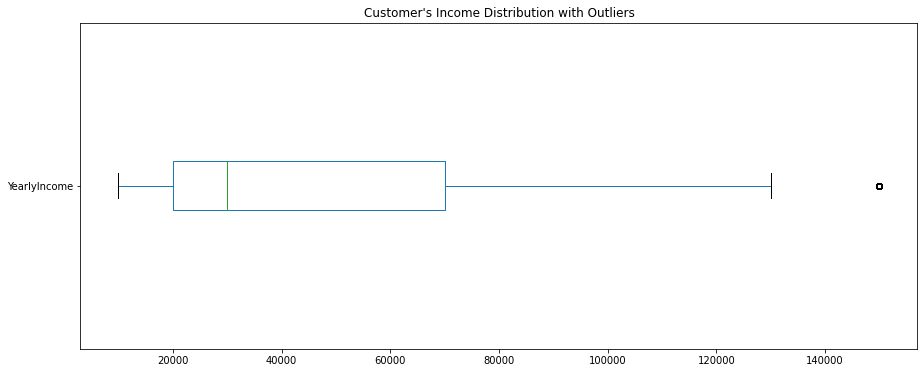

In [15]:
#Checking for outliers from customer's Age and their Yearly Income
fig,ax = plt.subplots(figsize=[15, 6])
consoto_data["YearlyIncome"].plot(kind="box",vert=False)
plt.title("Customer's Income Distribution with Outliers");

Text(0.5, 1.0, "Customer's Age Distribution with Outliers")

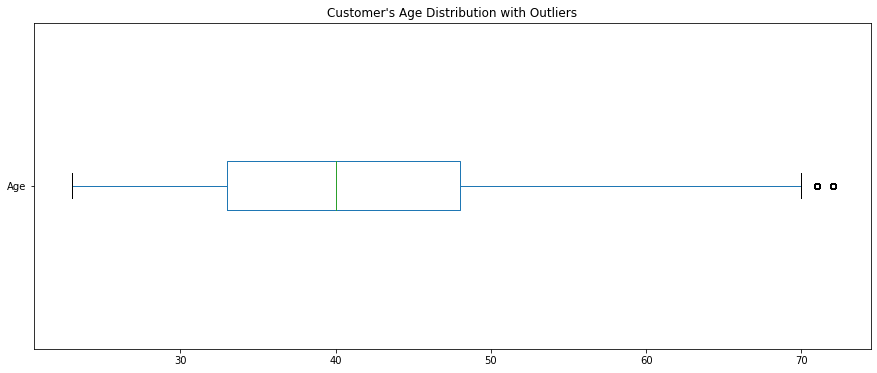

In [16]:
#Checking outliers in Customer's Age
fig,ax=plt.subplots(figsize=[15,6])
consoto_data["Age"].plot(kind="box",vert=False)
plt.title("Customer's Age Distribution with Outliers")

In [17]:
#Remove outliers
consoto_income=consoto_data["YearlyIncome"]<130000
consoto_age=   consoto_data["Age"]<70
consoto_data=consoto_data[consoto_income & consoto_age]


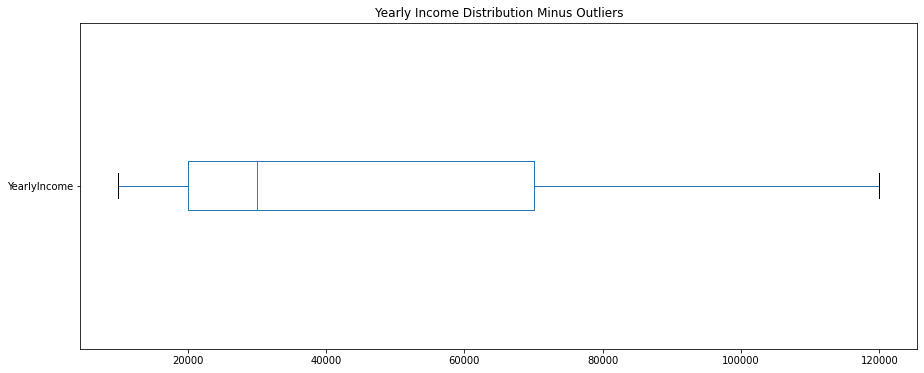

In [18]:
#Checking after removing outliers
fig,ax=plt.subplots(figsize=[15,6])
consoto_data["YearlyIncome"].plot(kind="box",vert=False)
plt.title("Yearly Income Distribution Minus Outliers");


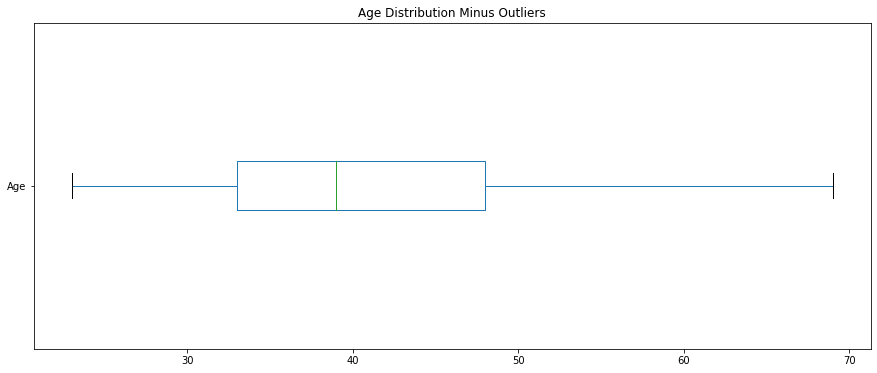

In [19]:
#Checking after removing outliers
fig,ax=plt.subplots(figsize=[15,6])
consoto_data["Age"].plot(kind="box",vert=False)
plt.title("Age Distribution Minus Outliers");

In [20]:
consoto_data['YearlyIncome'].mean()

46701.48690928732

1. Looking at the income distribution of the customers we find  the minimum yearly income is  10,000 while the maximum yearly income is 120,000.The average yearly income is 46701.49
2. When we look at the age distribution we find that 25% of them are of the age around 33 years while 75% of them around 48 years. The average  age is around 42 years.The oldest customers are of the age of 69 years while the youngest are of the age of 23 years.

In [21]:
#Removing Duplicates from Germany 
consoto_data['RegionCountryName']=consoto_data['RegionCountryName'].replace({'Germany ':'Germany'})
#View Customer's Region Country Name 
print('Customer Region Country Names\n',consoto_data['RegionCountryName'].value_counts().sort_values(ascending=False))
#View Customer's Region State province Name
print('\n Customer Region distribution by State Province Name \n','\n',consoto_data.groupby(['RegionCountryName'])['StateprovinceName'].value_counts().sort_values(ascending=False))

Customer Region Country Names
 Germany           70558
United States     22586
United Kingdom     4979
Name: RegionCountryName, dtype: int64

 Customer Region distribution by State Province Name 
 
 RegionCountryName  StateprovinceName
Germany            Berlin               70558
United States      Washington           22586
United Kingdom     England               4979
Name: StateprovinceName, dtype: int64


* Looking at the sales dataset by region name  we find that a majority of the customers come from United states followed united kingdom then Australia,Canada and Germany respectively.


* Breaking it down by customer's region state province name ,a majority of the customers from united states bought from Washington and also Texas who were the least from the listed states. Customers from England followed followed by those from New South Wales,then British Columbia,North Rhine-Westphalia Alberta and Bavaria.

In [22]:
#Saving cleaned dataset
contoso_cleaned=consoto_data.to_csv('D:/DS/P Tuts/Databases/SQL/queries/ContosoRetail/Contoso_Retail_Cleaned3.csv',index=False)
contoso_cleaned=pd.read_csv('D:/DS/P Tuts/Databases/SQL/queries/ContosoRetail/Contoso_Retail_Cleaned3.csv')
contoso_cleaned.head()


,CustomerKey,FullName,Gender,BirthDate,DateFirstPurchase,Age,YearlyIncome,Occupation,Education,MaritalStatus,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,CustomerType,FullDateLabel,CalendarDayOfWeekLabel,FiscalYear,FiscalYear.1,FiscalHalfYearLabel,FiscalQuarterLabel,CalendarMonthLabel,IsWorkDay,EuropeSeason,NorthAmericaSeason,AsiaSeason,ChannelName,SalesKey,SalesQuantity,UnitCost,UnitPrice,DiscountQuantity,DiscountAmount,SalesAmount,SalesProfitAmount,ProductName,ClassName,BrandName,StoreType,StoreName,Status,OnlineDiscountAmount,OnlineUnitCost,OnlineUnitPrice,OnlineTotalCost,OnlineSalesAmount,OnlineProfit,PromotionName,PromotionType,PromotionCategory,PromoDiscout%,PromoStartDate,PromoEndDate,PeriodBeforePromo(months),PromoPeriod(months),StateprovinceName,RegionCountryName,CustomerIsParent,CustomerFamilySize,CustomerFamilySizeAtHome,TotalCumulativeSales,TotalCumulativeProfit
0,193,James Brown,M,1945-09-13,2003-12-25,58,60000.0,Management,Undergraduate,M,4,0,1,2,Person,2007-01-01,Monday,2007,2007,H1,Q1,January,WorkDay,Holiday,Spring/Back to Business,Holiday,Reseller,2,4,10.15,19.9,1,0.995,78.605,38.005,Contoso Battery charger - bike E200 Black,Economy,Contoso,Reseller,Contoso North America Reseller,On,0.4495,4.13,8.99,4.13,8.5405,4.4105,North America Spring Promotion,Seasonal Discount,Store,0.05,2007-01-01,2007-03-31,34,2,Washington,United States,1,6,2,87.1455,42.4155
1,198,Andrea Morris,F,1946-06-18,2003-11-03,57,70000.0,Management,Undergraduate,M,3,1,0,1,Person,2007-01-01,Monday,2007,2007,H1,Q1,January,WorkDay,Holiday,Spring/Back to Business,Holiday,Reseller,2,4,10.15,19.9,1,0.995,78.605,38.005,Contoso Battery charger - bike E200 Black,Economy,Contoso,Reseller,Contoso North America Reseller,On,0.4495,4.13,8.99,4.13,8.5405,4.4105,North America Spring Promotion,Seasonal Discount,Store,0.05,2007-01-01,2007-03-31,34,2,Washington,United States,1,5,3,87.1455,42.4155
2,3026,Robert Alexander,M,1974-03-18,2002-08-01,28,30000.0,Skilled Manual,High School,M,0,0,1,2,Person,2007-01-01,Monday,2007,2007,H1,Q1,January,WorkDay,Holiday,Spring/Back to Business,Holiday,Reseller,2,4,10.15,19.9,1,0.995,78.605,38.005,Contoso Battery charger - bike E200 Black,Economy,Contoso,Reseller,Contoso North America Reseller,On,0.2370,2.42,4.74,2.42,4.5030,2.0830,North America Spring Promotion,Seasonal Discount,Store,0.05,2007-01-01,2007-03-31,34,2,Washington,United States,0,2,2,83.1080,40.0880
3,326,Elijah Ross,M,1939-07-02,2002-03-22,63,90000.0,Management,Undergraduate,S,5,0,1,2,Person,2007-01-01,Monday,2007,2007,H1,Q1,January,WorkDay,Holiday,Spring/Back to Business,Holiday,Reseller,2,4,10.15,19.9,1,0.995,78.605,38.005,Contoso Battery charger - bike E200 Black,Economy,Contoso,Reseller,Contoso North America Reseller,On,0.4495,4.13,8.99,4.13,8.5405,4.4105,North America Spring Promotion,Seasonal Discount,Store,0.05,2007-01-01,2007-03-31,34,2,Washington,United States,1,6,1,87.1455,42.4155
4,193,James Brown,M,1945-09-13,2003-12-25,58,60000.0,Management,Undergraduate,M,4,0,1,2,Person,2007-01-01,Monday,2007,2007,H1,Q1,January,WorkDay,Holiday,Spring/Back to Business,Holiday,Reseller,2,4,10.15,19.9,1,0.995,78.605,38.005,Contoso Battery charger - bike E200 Black,Economy,Contoso,Reseller,Contoso North America Reseller,On,9.4250,86.68,188.50,86.68,179.0750,92.3950,North America Spring Promotion,Seasonal Discount,Store,0.05,2007-01-01,2007-03-31,34,2,Washington,United States,1,6,2,257.6800,130.4000


In [62]:
contoso_cleaned.columns

Index(['CustomerKey', 'FullName', 'Gender', 'BirthDate', 'DateFirstPurchase',
       'Age', 'YearlyIncome', 'Occupation', 'Education', 'MaritalStatus',
       'TotalChildren', 'NumberChildrenAtHome', 'HouseOwnerFlag',
       'NumberCarsOwned', 'CustomerType', 'FullDateLabel',
       'CalendarDayOfWeekLabel', 'FiscalYear', 'FiscalYear.1',
       'FiscalHalfYearLabel', 'FiscalQuarterLabel', 'CalendarMonthLabel',
       'IsWorkDay', 'EuropeSeason', 'NorthAmericaSeason', 'AsiaSeason',
       'ChannelName', 'SalesKey', 'SalesQuantity', 'UnitCost', 'UnitPrice',
       'DiscountQuantity', 'DiscountAmount', 'SalesAmount',
       'SalesProfitAmount', 'ProductName', 'ClassName', 'BrandName',
       'StoreType', 'StoreName', 'Status', 'OnlineDiscountAmount',
       'OnlineUnitCost', 'OnlineUnitPrice', 'OnlineTotalCost',
       'OnlineSalesAmount', 'OnlineProfit', 'PromotionName', 'PromotionType',
       'PromotionCategory', 'PromoDiscout%', 'PromoStartDate', 'PromoEndDate',
       'PeriodBeforePr

In [23]:
#Getting a statistical view of data minus the outliers
contoso_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerKey,98123.0,9310.043741,5275.634963,193.000,5093.0000,9169.0000,13876.000,18419.000
Age,98123.0,40.894194,10.155994,23.000,33.0000,39.0000,48.000,69.000
YearlyIncome,98123.0,46701.486909,31955.489221,10000.000,20000.0000,30000.0000,70000.000,120000.000
TotalChildren,98123.0,1.731256,1.503375,0.000,0.0000,1.0000,3.000,5.000
NumberChildrenAtHome,98123.0,1.098448,1.472553,0.000,0.0000,0.0000,2.000,5.000
HouseOwnerFlag,98123.0,0.708040,0.454666,0.000,0.0000,1.0000,1.000,1.000
NumberCarsOwned,98123.0,1.459668,1.289914,0.000,0.0000,1.0000,2.000,4.000
FiscalYear,98123.0,2007.498915,0.776341,2007.000,2007.0000,2007.0000,2008.000,2009.000
FiscalYear.1,98123.0,2007.498915,0.776341,2007.000,2007.0000,2007.0000,2008.000,2009.000
SalesKey,98123.0,5.070809,3.340409,2.000,4.0000,4.0000,5.000,34.000


### 6. Exploratory Data Analysis
#### Comparing the Income and Parental Status with Education Level

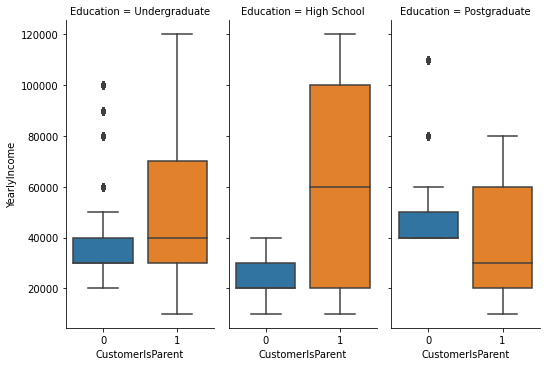

In [24]:
sns.catplot(x="CustomerIsParent",y="YearlyIncome",col="Education",kind="box",data=contoso_cleaned,aspect=0.5);

In [25]:
contoso_cleaned.groupby(['CustomerIsParent','Education'])['YearlyIncome'].sum().sort_values(ascending=False)

CustomerIsParent  Education    
1                 Undergraduate    1.858040e+09
                  High School      1.545460e+09
0                 Undergraduate    3.040000e+08
1                 Postgraduate     2.984700e+08
0                 Postgraduate     2.934500e+08
                  High School      2.830700e+08
Name: YearlyIncome, dtype: float64

In [26]:
contoso_cleaned[['CustomerIsParent','Education']].value_counts().sort_values(ascending=False)

CustomerIsParent  Education    
1                 Undergraduate    37928
                  High School      25722
0                 High School      11899
                  Undergraduate     8661
1                 Postgraduate      8167
0                 Postgraduate      5746
dtype: int64

* When we compare the yearly customer income by parental status and education level we  find that those with the  highest yearly income are customers who are not parents and their education level is undergradute .Followed by those who are parents  with postgraduate,then those who are not parents with the same education level.


* Looking at customers who are parents and are of the high school education level earn the least followed who are parents and have undergraduate education level.


* Customers who are parents with an  Undergraduate education level are the majority followed by those who are parents and have high school education level.Then customers who are not parents with high school and undergraduate education level respectively.


* Customers who have post graduate education level are the minority especially those who are not parents.

#### Comparing the  Marital and  Parental Status with Yearly Income

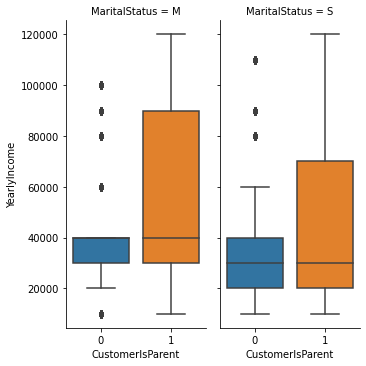

In [27]:
sns.catplot(x="CustomerIsParent",y="YearlyIncome",col="MaritalStatus",kind="box",data=contoso_cleaned,aspect=0.5);

In [28]:
contoso_cleaned.groupby(['MaritalStatus','CustomerIsParent'])['YearlyIncome'].sum().sort_values(ascending=False)

MaritalStatus  CustomerIsParent
M              1                   2.393510e+09
S              1                   1.308460e+09
               0                   4.992600e+08
M              0                   3.812600e+08
Name: YearlyIncome, dtype: float64

In [29]:
contoso_cleaned[['MaritalStatus','CustomerIsParent']].value_counts().sort_values(ascending=False)

MaritalStatus  CustomerIsParent
M              1                   43084
S              1                   28733
               0                   15466
M              0                   10840
dtype: int64

* Customers who are single and don't have any children have the highest yearly income followed by those who are married and don't have children.


* Customers who are single and are parents have a less yearly income than those who are single and don't have children.


* Customers who are married and are parents are the majority followed by those who are single parents.Then customers who are single and have children followed by customers who are married and are not parents.



#### Size of the family in relation to Income and Education Levels

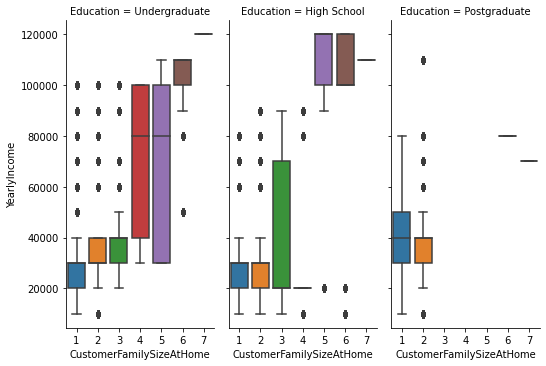

In [30]:
sns.catplot(x="CustomerFamilySizeAtHome",y="YearlyIncome",col="Education",data=contoso_cleaned,kind="box",aspect=0.5);

In [31]:
contoso_cleaned.groupby(['CustomerFamilySize','Education'])['YearlyIncome'].sum().sort_values(ascending=False)

CustomerFamilySize  Education    
3                   Undergraduate    656970000.0
4                   High School      624650000.0
5                   High School      487780000.0
                    Undergraduate    406090000.0
4                   Undergraduate    321440000.0
2                   Undergraduate    320640000.0
6                   Undergraduate    219030000.0
1                   High School      211620000.0
2                   Postgraduate     180780000.0
6                   High School      171160000.0
1                   Undergraduate    146110000.0
                    Postgraduate     141530000.0
7                   High School      136900000.0
3                   High School      104140000.0
2                   High School       92280000.0
7                   Undergraduate     91760000.0
3                   Postgraduate      83980000.0
4                   Postgraduate      67540000.0
5                   Postgraduate      52970000.0
7                   Postgraduate   

In [32]:
contoso_cleaned[['CustomerFamilySize','Education']].value_counts().sort_values(ascending=False)[:10]

CustomerFamilySize  Education    
3                   Undergraduate    18117
2                   Undergraduate     9197
1                   High School       8801
4                   High School       8560
5                   High School       5985
4                   Undergraduate     5721
5                   Undergraduate     5398
2                   Postgraduate      4861
3                   High School       4532
1                   Undergraduate     4343
dtype: int64

* When looking at the top 3 yearly income total we find customer's family size and education in relation to their income we find that those with a family size of 3 and with an undergraduate education level have the highest yearly income followed by those with a family size of 4 having high school education level followed by those with a family size of 5 with the same  education level.


* The largest family size based on customer data is 7 and the least yearly income come from customers with post graduate education level and with a family size 6.


* Customers with a family size of 3 and have an education level of undergraduate are the majority followed by those with a family size of 2 with an undergraduate level ,then those with a family size of 1 with a high school education followed by those with a family size of 4 with the same education level ,then those with a family size of 5  with high school education level.


* We find that the customer's who have the highest yearly income have a small family size of 3,those who have the least yearly Income have a large family size of 6


#### Comparing the Sales Per Customer  and Parental Status with Education Level

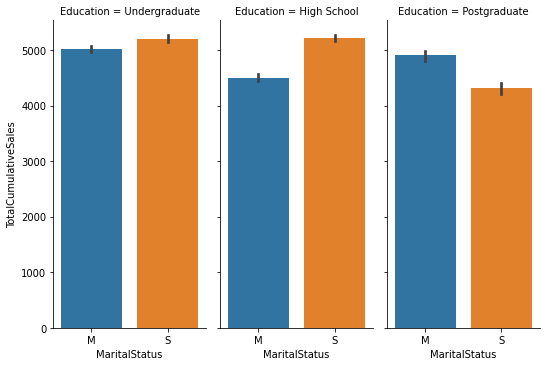

In [33]:
sns.catplot(x="MaritalStatus",y="TotalCumulativeSales",col="Education",kind="bar",data=contoso_cleaned,aspect=0.5);

In [34]:
contoso_cleaned[['MaritalStatus','Education']].value_counts().sort_values(ascending=False)

MaritalStatus  Education    
M              Undergraduate    28354
S              High School      20229
               Undergraduate    18235
M              High School      17392
               Postgraduate      8178
S              Postgraduate      5735
dtype: int64

* Comparing customer's purchasing behaviour we find that customers who have high school education level spend more and  than those who are married with the same education level.


* This is followed by customers who have undergraduate education level and are single  spend  slightly more than those married.


* Looking at customers with a postgraduate education we find that those who are married spend more than those who are single.


* Looking at the cumulative sales all customers had cumulative purchases between 4000 and 5500.


* Comparing customer purchases a majority of the customers are married and have an undegraduate education followed by those who are msingle and have high school education level then those who are single with undergraduate education closely followed by those who are married with  high school education level.


* The least number of customers are those who have a post graduate education level with those who are single being few  than those married.

#### Comparing Yearly Incomes with regards to gender and Marital Status

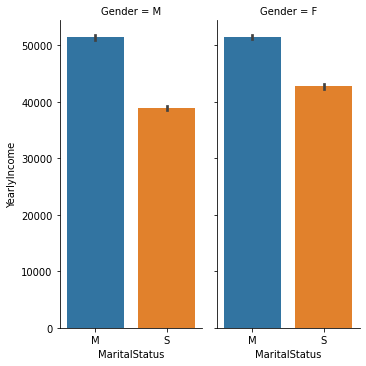

In [35]:
sns.catplot(x="MaritalStatus",y="YearlyIncome",col="Gender",kind="bar",data=contoso_cleaned,aspect=0.5);

In [36]:
contoso_cleaned[['MaritalStatus','Gender']].value_counts().sort_values(ascending=False)

MaritalStatus  Gender
M              F         28623
               M         25301
S              F         22447
               M         21752
dtype: int64

* Customers with the  most income are either male and single or female and married .
* Customers who are married and irrigardless of their gender have a higher yearly income than those who are single.
* Customers who are female and married  are the majority followed by those who are male and married.
* The least number of customers are those who are male and single.

#### Comparing Yearly Incomes with regards to gender and Education Level

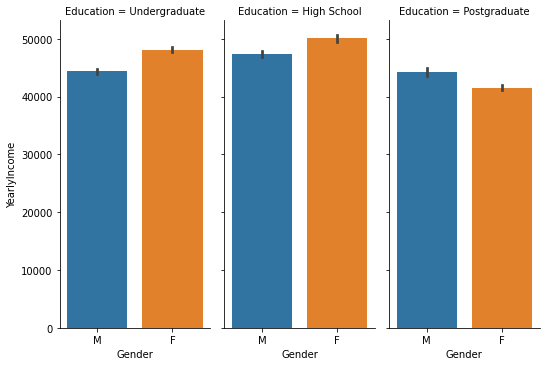

In [37]:
sns.catplot(x="Gender",y="YearlyIncome",col="Education",kind="bar",data=contoso_cleaned,aspect=0.5);

In [38]:
contoso_cleaned.groupby(['Gender'])['YearlyIncome'].sum().sort_values(ascending=False)

Gender
F    2.433580e+09
M    2.148910e+09
Name: YearlyIncome, dtype: float64

* Customers with a high school education level earn the most with the males earning more.
* Customers wo are male with an undergraduate education level come in as second highest in total yearly income.
* Customer who are female and have an undergraduate education level earn the least.
* In general female customers  have a higher total income than the male customers.

#### Comparing customer's Cumulative Sales with Marital Status and FamilySize At Home

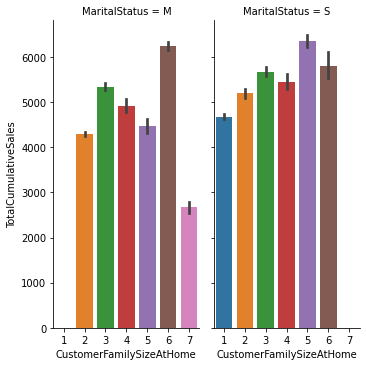

In [39]:
sns.catplot(x="CustomerFamilySizeAtHome",y="TotalCumulativeSales",col="MaritalStatus",kind="bar",data=contoso_cleaned,aspect=0.5);

In [40]:
contoso_cleaned.groupby(['MaritalStatus','CustomerFamilySize'])['TotalCumulativeSales'].sum().sort_values(ascending=False)

MaritalStatus  CustomerFamilySize
M              3                     8.781109e+07
S              1                     7.271409e+07
M              2                     5.452840e+07
               5                     5.339423e+07
S              3                     4.650854e+07
               2                     4.241539e+07
               4                     4.109075e+07
M              4                     3.002006e+07
               6                     1.998873e+07
               7                     1.494718e+07
S              6                     1.254128e+07
               5                     9.712881e+06
Name: TotalCumulativeSales, dtype: float64

In [41]:
contoso_cleaned[["Age","CustomerFamilySize","Education"]].value_counts().sort_values(ascending=False)[:10]

Age  CustomerFamilySize  Education    
46   4                   High School      2511
31   3                   Undergraduate    1981
36   3                   Undergraduate    1910
31   1                   High School      1850
35   2                   Postgraduate     1828
36   2                   Undergraduate    1679
45   3                   Undergraduate    1661
37   3                   Undergraduate    1307
32   2                   Undergraduate    1290
42   3                   Undergraduate    1270
dtype: int64

* Looking at the cumulative yearly sales ,customers who are single  with a family size of 5 spend the most followed by  those who are married with a family size of 3 ,then those who are single and with a family size of 1.


* Looking at the customer's family size and marital status in regards to their purchase we find that customers who are single with a family size of 6 spend the least,followed by those who are married with a family size of 7 and 6 respectively.


* A majority of the customers have a high school education and are 46 years with a family size of 4.While the minority of them have an undergraduate education and are 42 years.


* Customers who have post graduate education have a family size of 2 and are 35 years.


<Figure size 720x360 with 0 Axes>

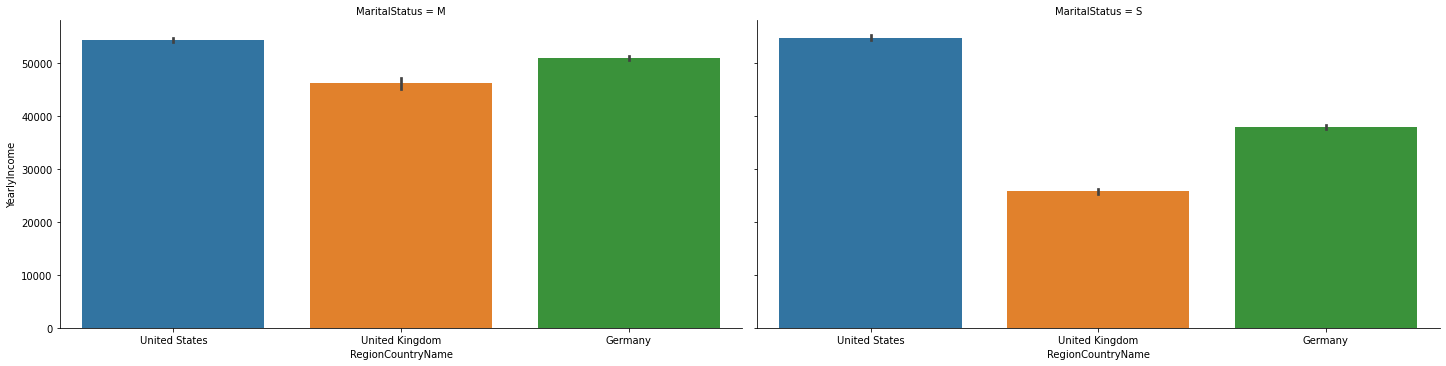

In [42]:
plt.figure(figsize=(10,5))
sns.catplot(x="RegionCountryName",y="YearlyIncome",col="MaritalStatus",kind="bar",data=contoso_cleaned,aspect=2);

* Customers who are single and from United Stated have the highest yearly income  followed by those who are married from the same country.
* Customers from Germany who are married have  more yearly income than those who are single.
* Customers from united kingdom and are single have  the least yearly income followed by those who are married and are from the same country.
 

<Figure size 720x360 with 0 Axes>

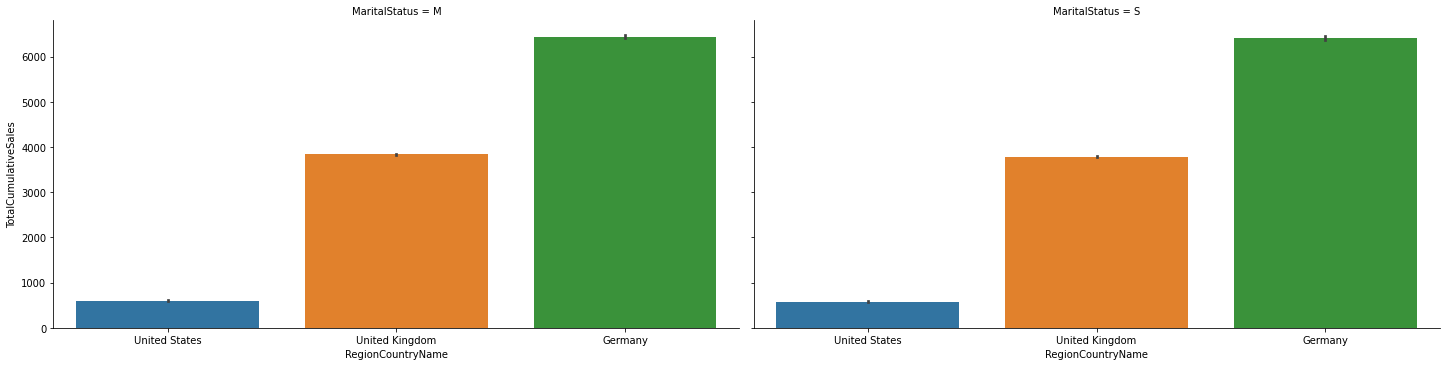

In [43]:
plt.figure(figsize=(10,5));
sns.catplot(x="RegionCountryName",y="TotalCumulativeSales",col="MaritalStatus",kind="bar",data=contoso_cleaned,aspect=2);

* Customers from united kingdom despite having the least yearly income spend more especially those who are married followed by those who are single.

* Customers from United States have the least cumulative sales whether irrespective of their marital status.

* Customers from germany have the highest sales  more irrespecive of marital status.

* **Worth noting is the more customers from a particular country earn does not equate to most sales.**

### Customer Purchase Frequency 
#### Top 10 Customers(Most Frequent)

In [44]:
contoso_cleaned[['CustomerKey','FullName','RegionCountryName']].value_counts()[:10]

CustomerKey  FullName           RegionCountryName
9065         Whitney Prasad     Germany              528
8312         Dana Rubio         Germany              524
1739         Melinda Rubio      Germany              502
14323        Tina Perez         Germany              500
425          Pamela Garcia      Germany              498
7183         Kristi Prasad      Germany              494
13712        Rebekah Hernandez  Germany              494
8454         Veronica Rana      Germany              492
10551        Kara Deng          Germany              492
2560         Lori Ramos         Germany              488
dtype: int64

#### Bottom 10 Customer(Least Frequent Customers)

In [45]:
contoso_cleaned[['CustomerKey','FullName','RegionCountryName']].value_counts()[-10:]

CustomerKey  FullName           RegionCountryName
13765        Abigail Hughes     United States        71
12109        Savannah Wright    United States        70
14292        Marissa Griffin    United States        68
11326        Noah Rodriguez     United Kingdom        2
576          Jackson Campbell   United Kingdom        2
1225         Tristan Henderson  United Kingdom        1
3863         Spencer Jenkins    United Kingdom        1
1368         Trinity Townsend   United Kingdom        1
1273         Justin Alexander   United Kingdom        1
1215         Julie Raje         United Kingdom        1
dtype: int64

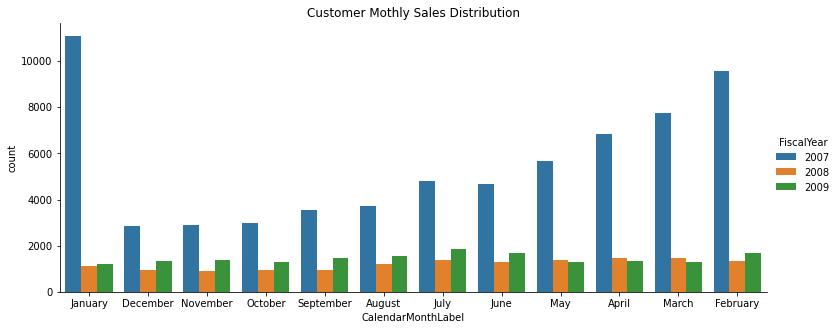

In [46]:
sns.catplot(data=contoso_cleaned,x='CalendarMonthLabel',kind='count',hue="FiscalYear",height=4.27, aspect=2.5)
plt.title("Customer Mothly Sales Distribution")
plt.show()

#### Customer Purchases in relation to the Fiscal Year

<Figure size 720x360 with 0 Axes>

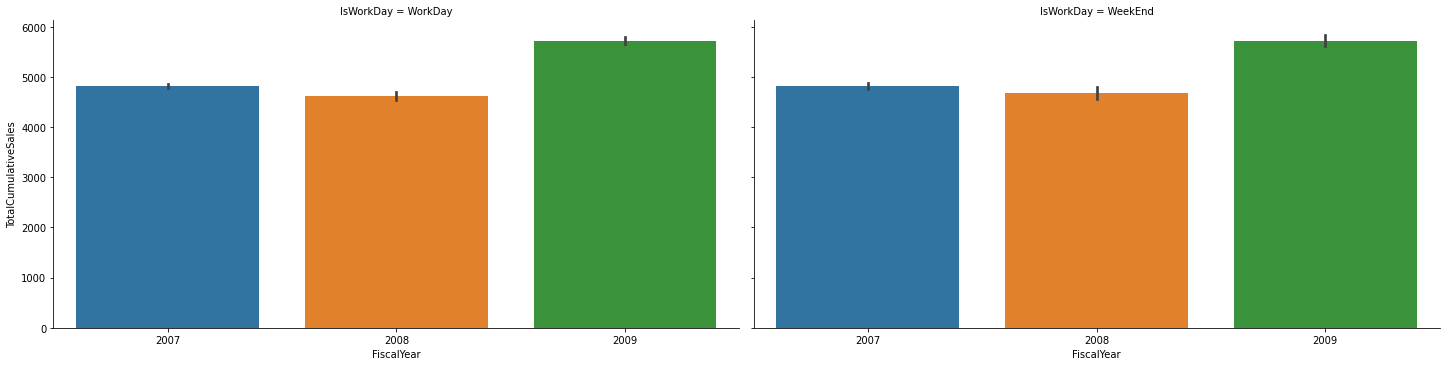

In [47]:
plt.figure(figsize=(10,5))
sns.catplot(x="FiscalYear",y="TotalCumulativeSales",col="IsWorkDay",kind="bar",data=contoso_cleaned,aspect=2)

In [48]:
contoso_cleaned.groupby(['FiscalYear'])['TotalCumulativeSales'].sum().sort_values(ascending=False)

FiscalYear
2007    3.201368e+08
2009    9.902374e+07
2008    6.651213e+07
Name: TotalCumulativeSales, dtype: float64

In [49]:
contoso_cleaned.groupby(['FiscalYear','IsWorkDay'])['TotalCumulativeSales'].sum().sort_values(ascending=False)

FiscalYear  IsWorkDay
2007        WorkDay      2.284101e+08
            WeekEnd      9.172670e+07
2009        WorkDay      7.055447e+07
2008        WorkDay      4.714521e+07
2009        WeekEnd      2.846927e+07
2008        WeekEnd      1.936692e+07
Name: TotalCumulativeSales, dtype: float64

* Looking at the sales across the years we find that 2009 had the highest cumulative sales followed by 2008 then 2007.

* In 2007 more sales happened during the weekend than week day which is different for 2008 and 2009  as most sales took place during the weeday.

* Comparing the sales on weekends we find that 2007 had the highest while 2008 had the least sales ,while looking at the weekdays we find that 2009 had the highest while the still in the same year weekends sales were the least over the past two years.

#### Viewing a distribution of  Customer's Total Cumulative Sales

<AxesSubplot: >

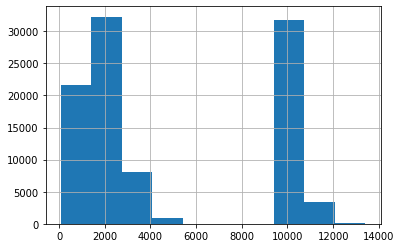

In [50]:
contoso_cleaned['TotalCumulativeSales'].hist()

#### Viewing  a distribution of Marital Status of our Customers

<AxesSubplot: >

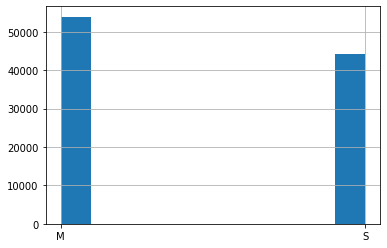

In [51]:
contoso_cleaned['MaritalStatus'].hist()

#### Viewing the distribution in regards to customer gender

<AxesSubplot: >

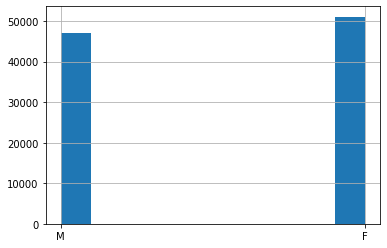

In [52]:
contoso_cleaned['Gender'].hist()

#### Viewing Age distribution Across our Customers

<AxesSubplot: >

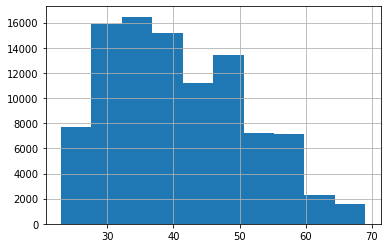

In [53]:
contoso_cleaned['Age'].hist()

#### Viewing the  distribution of the Size of Family currently at home. 

<AxesSubplot: >

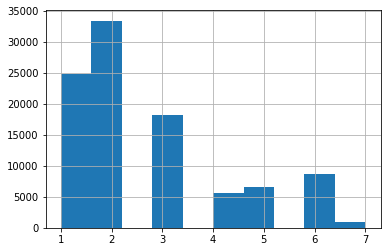

In [54]:
contoso_cleaned['CustomerFamilySizeAtHome'].hist()

In [55]:
contoso_cleaned.corr()

,CustomerKey,Age,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,FiscalYear,FiscalYear.1,SalesKey,SalesQuantity,UnitCost,UnitPrice,DiscountQuantity,DiscountAmount,SalesAmount,SalesProfitAmount,OnlineDiscountAmount,OnlineUnitCost,OnlineUnitPrice,OnlineTotalCost,OnlineSalesAmount,OnlineProfit,PromoDiscout%,PeriodBeforePromo(months),PromoPeriod(months),CustomerIsParent,CustomerFamilySize,CustomerFamilySizeAtHome,TotalCumulativeSales,TotalCumulativeProfit
CustomerKey,1.000000,-0.062073,-0.052963,-0.070782,-0.070793,-0.275387,0.026920,0.018892,0.018892,-0.000198,-0.041868,-0.070984,-0.067447,-0.035170,-0.043065,-0.043416,-0.040438,-0.055634,-0.008946,-0.009752,-0.009202,-0.003294,0.001909,-0.068830,-0.000719,-0.036748,-0.109884,-0.108397,-0.110488,-0.043731,-0.040321
Age,-0.062073,1.000000,0.434480,0.626272,0.237195,0.212509,0.395036,-0.057187,-0.057187,0.023174,-0.034648,-0.068497,-0.065458,-0.035200,-0.042109,-0.042096,-0.039382,0.047222,0.052950,0.060115,0.057114,0.058302,0.051303,-0.052824,0.020169,-0.034385,0.573817,0.632216,0.277900,-0.037453,-0.035770
YearlyIncome,-0.052963,0.434480,1.000000,0.443126,0.629188,0.138132,0.684660,-0.132411,-0.132411,0.105840,-0.025996,-0.132989,-0.119955,-0.067661,-0.066320,-0.068461,-0.062944,0.133319,0.149499,0.177787,0.154417,0.174539,0.166914,-0.003927,0.106299,-0.081392,0.250557,0.458339,0.637580,-0.054493,-0.051164
TotalChildren,-0.070782,0.626272,0.443126,1.000000,0.538315,0.196065,0.435333,-0.064544,-0.064544,0.043279,-0.020974,-0.079561,-0.066681,-0.046232,-0.031414,-0.034155,-0.029955,0.052030,0.059446,0.067658,0.063676,0.065888,0.058678,-0.016054,0.019862,-0.026247,0.696963,0.952917,0.533942,-0.028892,-0.025817
NumberChildrenAtHome,-0.070793,0.237195,0.629188,0.538315,1.000000,0.190157,0.611503,-0.034959,-0.034959,-0.050295,0.083365,0.160120,0.158911,0.074678,0.108391,0.106856,0.101393,0.087728,0.060714,0.088949,0.062503,0.084242,0.090238,0.128418,-0.070132,0.094240,0.439513,0.513601,0.949396,0.113758,0.107824
HouseOwnerFlag,-0.275387,0.212509,0.138132,0.196065,0.190157,1.000000,-0.006906,-0.024025,-0.024025,0.023644,0.000347,-0.003917,-0.005021,-0.003783,-0.004855,-0.004178,-0.004246,0.029773,0.022375,0.025997,0.024192,0.024009,0.020587,0.002479,0.020151,-0.004877,0.315640,0.261025,0.260033,-0.002251,-0.002791
NumberCarsOwned,0.026920,0.395036,0.684660,0.435333,0.611503,-0.006906,1.000000,-0.065428,-0.065428,0.015637,-0.012572,-0.078425,-0.058184,-0.045393,-0.016679,-0.022109,-0.017010,0.071826,0.064330,0.089680,0.066597,0.086794,0.091202,0.003135,-0.012950,-0.009389,0.234010,0.416391,0.585234,-0.015150,-0.010565
FiscalYear,0.018892,-0.057187,-0.132411,-0.064544,-0.034959,-0.024025,-0.065428,1.000000,1.000000,-0.054077,0.058149,0.141013,0.132988,0.068685,0.082260,0.083029,0.077465,-0.116793,-0.162421,-0.166148,-0.227606,-0.165623,-0.093156,0.077199,-0.059293,0.069022,-0.034719,-0.074201,-0.047764,0.069796,0.070910
FiscalYear.1,0.018892,-0.057187,-0.132411,-0.064544,-0.034959,-0.024025,-0.065428,1.000000,1.000000,-0.054077,0.058149,0.141013,0.132988,0.068685,0.082260,0.083029,0.077465,-0.116793,-0.162421,-0.166148,-0.227606,-0.165623,-0.093156,0.077199,-0.059293,0.069022,-0.034719,-0.074201,-0.047764,0.069796,0.070910
SalesKey,-0.000198,0.023174,0.105840,0.043279,-0.050295,0.023644,0.015637,-0.054077,-0.054077,1.000000,0.214634,-0.309532,-0.248231,-0.101458,-0.075090,-0.068280,-0.057082,0.005864,0.054010,0.050868,0.055072,0.054116,0.045963,0.392727,0.901770,-0.294073,0.015853,0.052650,-0.033644,-0.064004,-0.053856


#### Observing correlation among features in our dataset.

In [56]:
contoso_cleaned['StoreType'].value_counts()

Online      70558
Store       14594
Reseller    12971
Name: StoreType, dtype: int64

<AxesSubplot: >

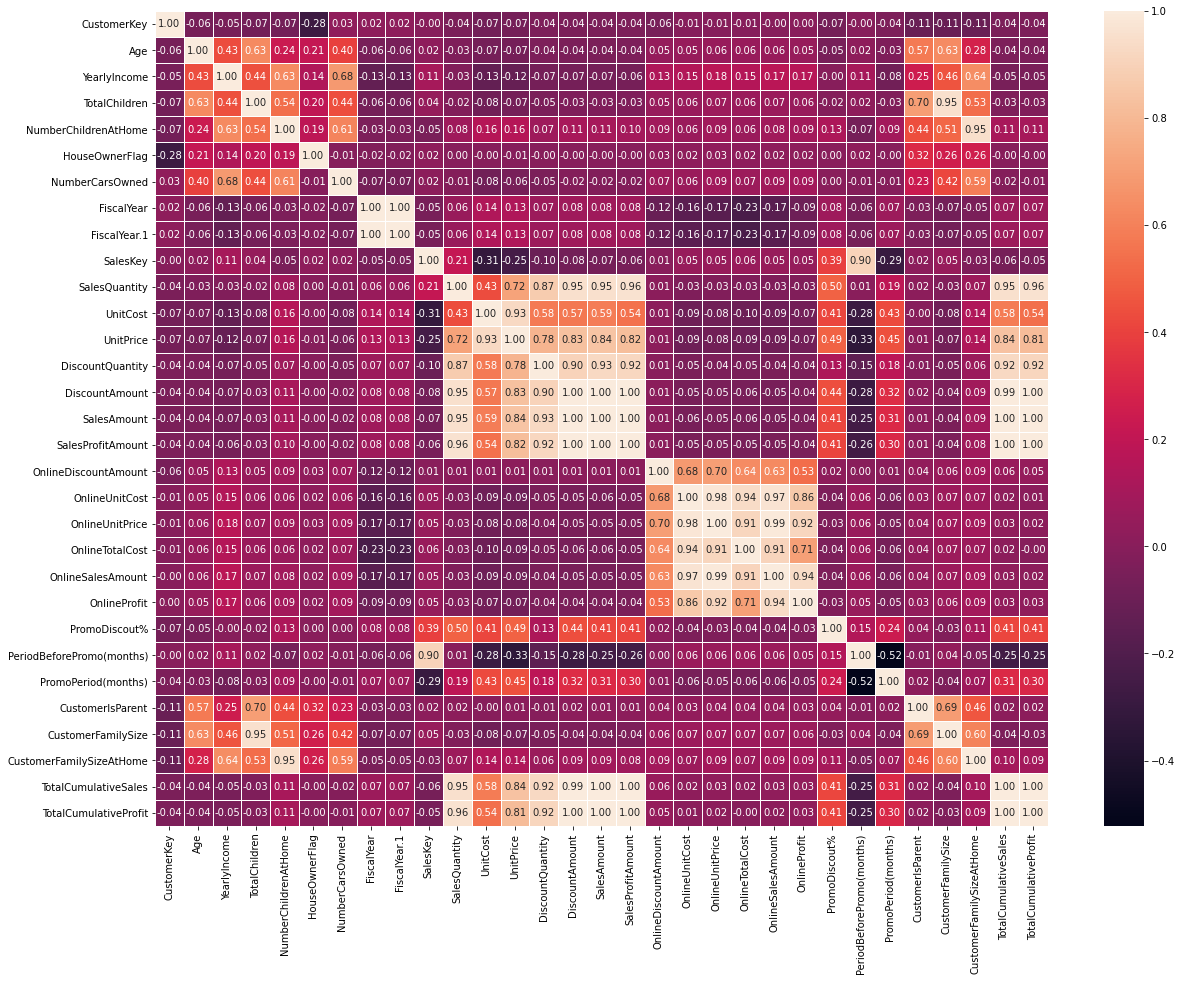

In [57]:
#Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(data=contoso_cleaned.corr(),linewidth=.5,annot=True,fmt='.2f')